In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d as conv2
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Kernel padding for same convolution with
# circular padding in the Fourier domain

def kernpad(K,size):
    Ko = np.zeros(size,dtype=np.float32)
    ks = K.shape
    hk = (ks[0]-1)//2
    wk = (ks[1]-1)//2

    Ko[:(hk+1),:(wk+1)] = K[hk:,wk:]
    Ko[:(hk+1),-wk:] = K[hk:,:wk]
    Ko[-hk:,:(wk+1)] = K[:hk,wk:]
    Ko[-hk:,-wk:] = K[:hk,:wk]

    return Ko

<IPython.core.display.Javascript object>


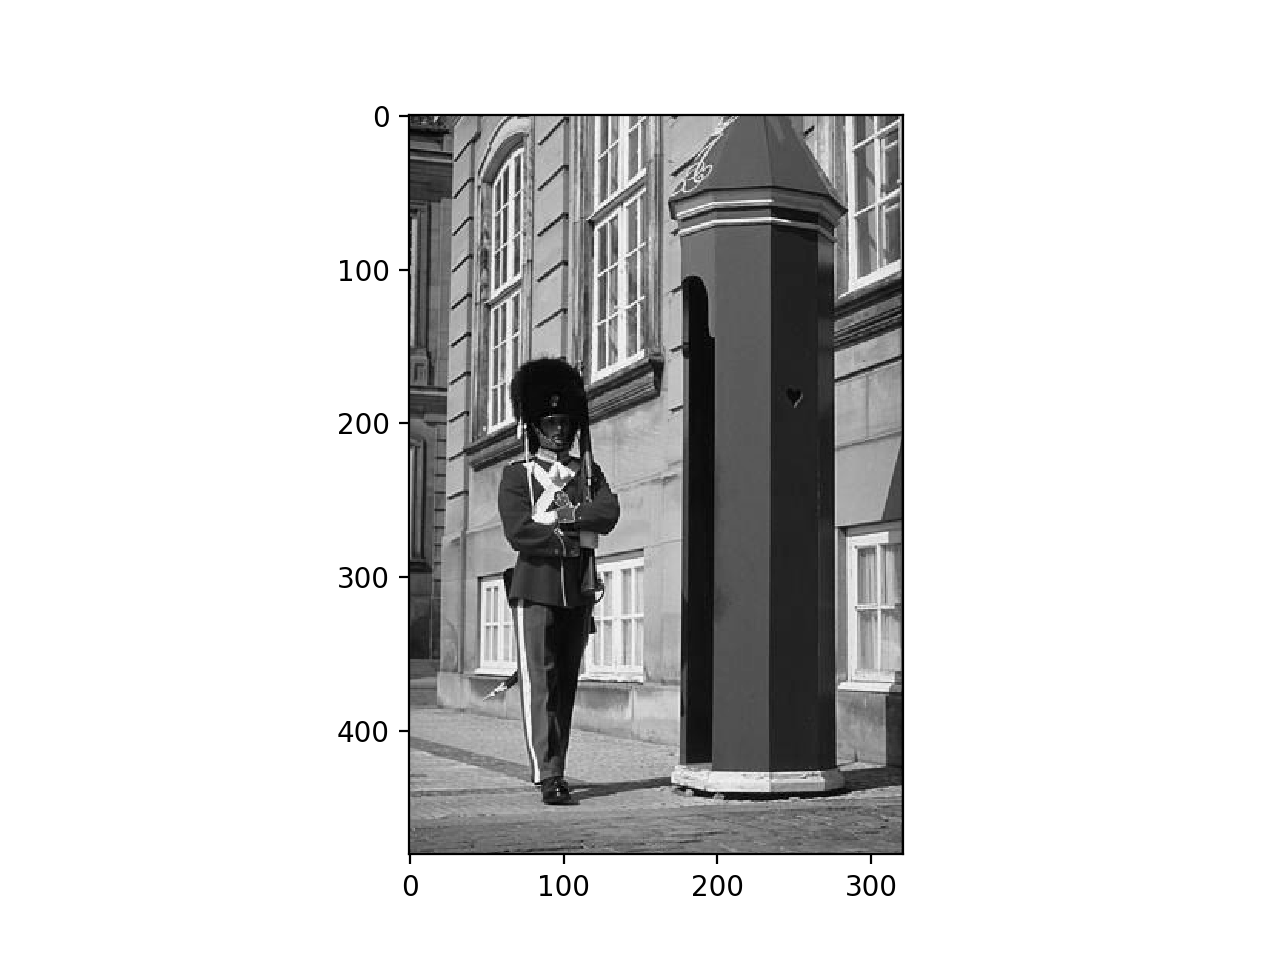

In [3]:
# Load an image
img = np.float32(imread('example.jpg'))/255.
plt.imshow(img, cmap='gray')

<IPython.core.display.Javascript object>


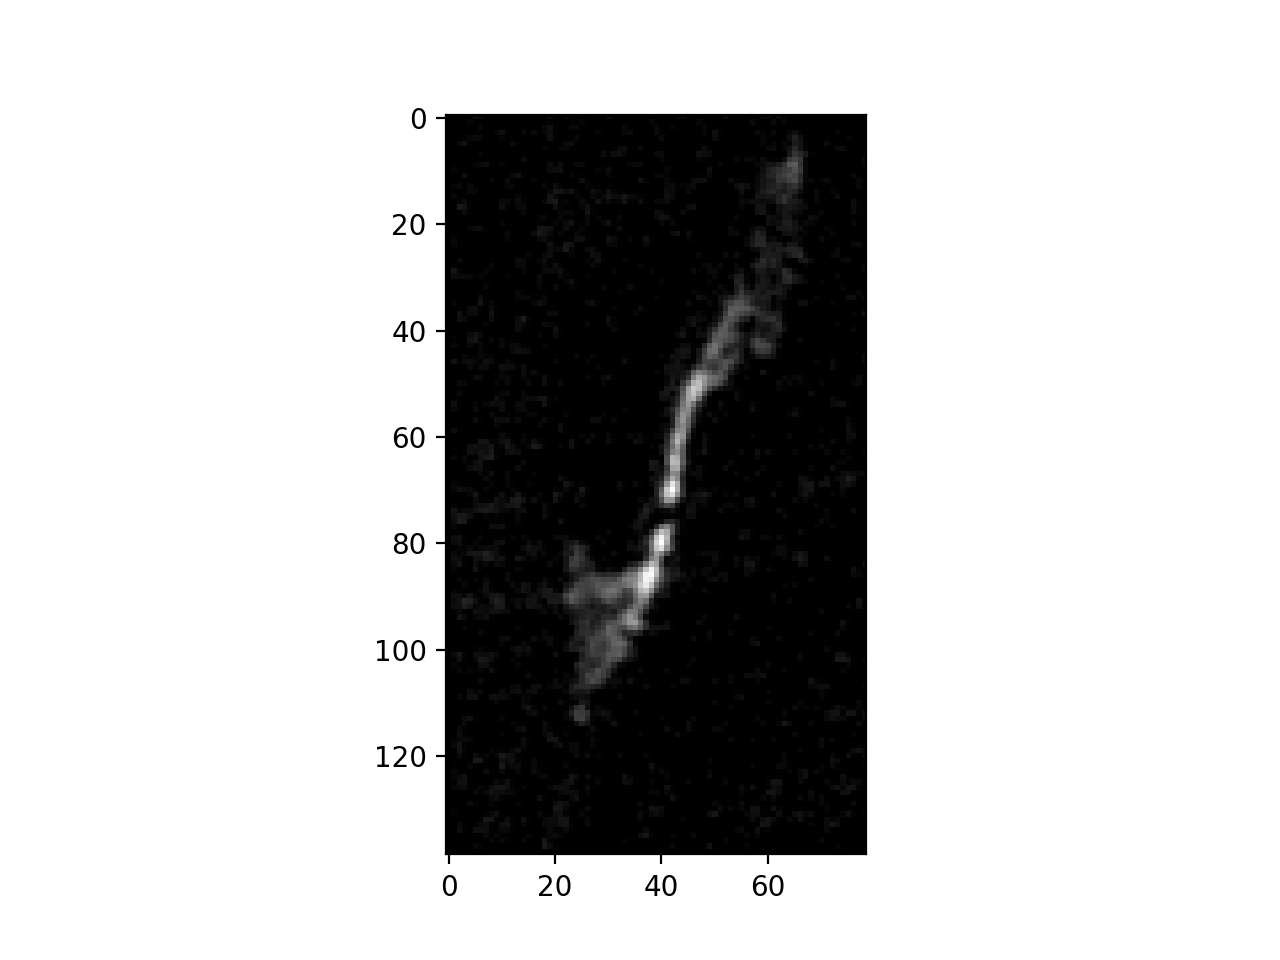

In [4]:
# Define a blur kernel
k = np.float32(imread('blur_kernel.png', as_gray=True))
# k = np.random.random([15,15])
k = k / np.sum(k)
plt.imshow(k, cmap='gray')

<IPython.core.display.Javascript object>


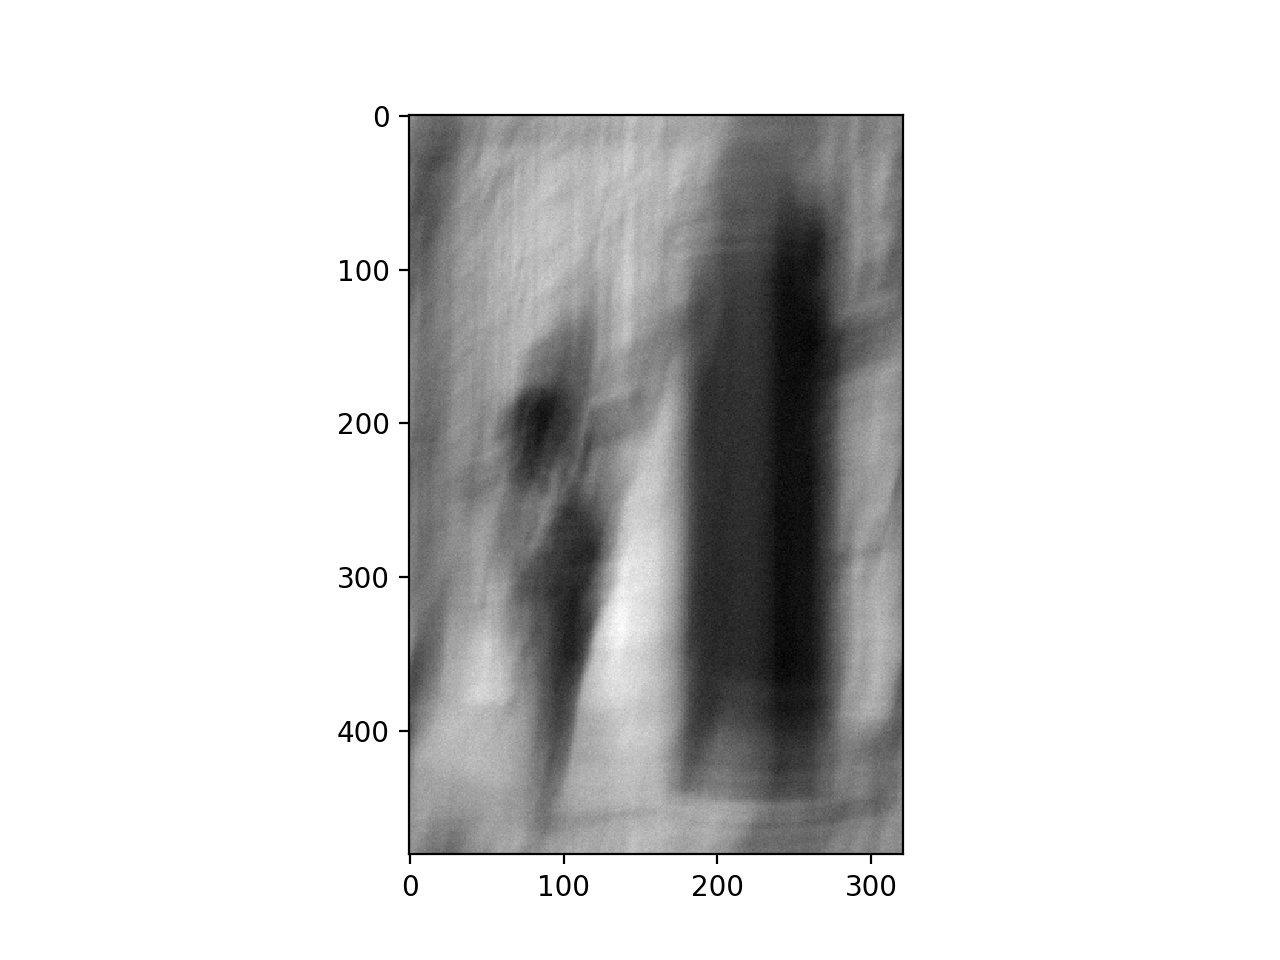

In [5]:
# Blur the image and add noise
blur = conv2(img, k, mode='same', boundary='wrap') + np.random.normal(scale=0.01,size=img.shape)
plt.imshow(blur, cmap='gray')

In [6]:
imsave('blur.jpg',np.uint8(blur*255.))

In [7]:
# Derivative kernel
kx = np.array([[1.,0,-1.],[2.,0,-2.],[1.,0,-1.]])
ky = np.array([[1.,2.,1.],[0,0,0],[-1.,-2.,-1.]])

# Gaussian derivative
gx = gaussian_filter(kx, sigma=1, mode='wrap')
gy = gaussian_filter(ky, sigma=1, mode='wrap')

# Fourier transform of circular padded kernels
size = img.shape
k_fft = np.fft.fft2(kernpad(k, size))
gx_fft = np.fft.fft2(kernpad(gx, size))
gy_fft = np.fft.fft2(kernpad(gy, size))

# Fourier transform of blurry image
blur_fft = np.fft.fft2(blur)

<IPython.core.display.Javascript object>


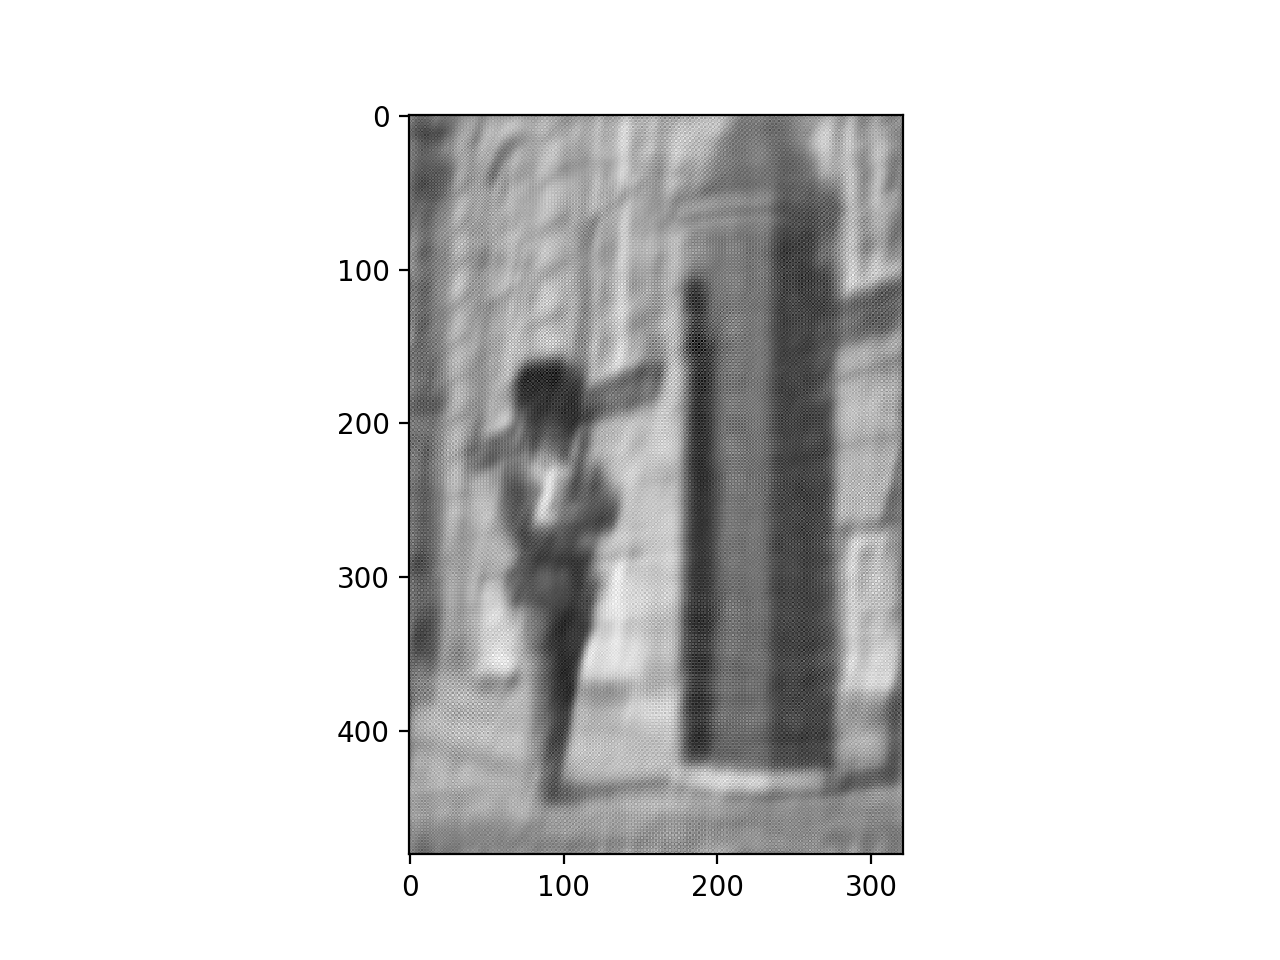

In [8]:
lmd = 0.1

# Deblur in Fourier domain
numerator = np.conj(k_fft)

denominator = np.abs(k_fft)**2 + lmd * (np.abs(gx_fft)**2 + np.abs(gy_fft)**2)

pred_fft = numerator/denominator * blur_fft
pred = np.real(np.fft.ifft2(pred_fft))

plt.imshow(pred, cmap='gray')